In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc1-csvsdmlp/kc1_csv.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = '../input/kc1-csvsdmlp/kc1_csv.csv'

df = pd.read_csv(data)

In [5]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (2109, 22)


In [6]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [7]:
train,test = train_test_split(df, test_size=0.3, random_state=5)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (1476, 22)
Testing Data : (633, 22)


In [8]:
train_data = train.iloc[:,:]
test_data = test.iloc[:,:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (1476, 22)
Testing Data : (633, 22)


In [9]:
X = df.drop(['defects'], axis=1)

y = df['defects']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1476, 21), (633, 21))

In [12]:
X_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
1240,1.0,1.0,1.0,1.0,4.0,8.00,0.67,1.5,5.33,12.00,...,0.67,0,0,0,0,3.0,1.0,3.0,1.0,1.0
794,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.5,5.33,12.00,...,0.67,0,0,0,0,3.0,1.0,3.0,1.0,1.0
1814,4.0,1.0,1.0,1.0,5.0,11.61,0.50,2.0,5.80,23.22,...,1.29,2,0,0,0,4.0,1.0,4.0,1.0,1.0
1412,3.0,1.0,1.0,1.0,5.0,11.61,0.67,1.5,7.74,17.41,...,0.97,0,0,0,0,3.0,2.0,3.0,2.0,1.0
1490,6.0,1.0,1.0,1.0,5.0,11.61,0.67,1.5,7.74,17.41,...,0.97,2,2,0,0,3.0,2.0,3.0,2.0,1.0


In [13]:
X_train.shape

(1476, 21)

In [14]:
cols = X_train.columns

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [16]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [17]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [18]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8373


In [19]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8373


In [20]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

e                    0.086498
d                    0.086433
t                    0.071997
v                    0.071779
loc                  0.069293
total_Opnd           0.060678
n                    0.059000
lOCode               0.058926
i                    0.055343
total_Op             0.052841
uniq_Opnd            0.046635
uniq_Op              0.039147
b                    0.037292
lOBlank              0.036537
branchCount          0.033403
v(g)                 0.027282
lOComment            0.027154
l                    0.026499
iv(g)                0.022844
locCodeAndComment    0.016209
ev(g)                0.014208
dtype: float64

In [22]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[503  23]
 [ 80  27]]


<AxesSubplot:>

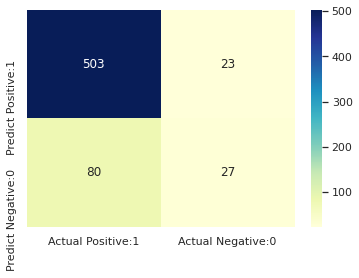

In [23]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.91       526
        True       0.54      0.25      0.34       107

    accuracy                           0.84       633
   macro avg       0.70      0.60      0.63       633
weighted avg       0.81      0.84      0.81       633

